# HW12 Reinforcement Learning - DQN

There are two parts of training:
- Policy Gradient (in the Pre-Training cell)
- DQN

Note that, it can skip Policy Gradient part.

resource:
- https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
- https://speech.ee.ntu.edu.tw/~hylee/ml/2023-spring.php
- https://speech.ee.ntu.edu.tw/~hylee/ml/2021-spring.php

# Preliminary work

## Colab Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Install Packages

In [ ]:
!apt update
!apt install python3-opengl xvfb -y
!apt install -q swig
!pip install gym[box2d] pyvirtualdisplay

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [2,161 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,966 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updat

## Set up Virtual displayer

In [ ]:
# Store the output of this cell into variable 'captured_output' instead of
#   printing out.
%%capture captured_output
from pyvirtualdisplay import Display
virtual_display = Display(visible=False, size=(1400, 900))
virtual_display.start()


# Environment and Seed

In [ ]:
import gym
import random
import torch
import numpy as np


def create_env(env_name):
    return gym.make(env_name)

def fix_seed(env, seed):
    env.seed(seed)
    env.action_space.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

# Random Agent Test

Action | sign of Reward
- not doing any thing [0] | +
- main engine fire below [2] | -
- main engine fire right [1] | -
- main engine fire left [3] | +

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from IPython import display


# Create environment
env = create_env('LunarLander-v2')
fix_seed(env, 2024)

# Initial environment
initial_state = env.reset()

# print rewards base on different actions
for i in range(4):
    env.reset(seed=1)
    print(initial_state)
    state, reward, done, _ = env.step(i)
    print(f'{i} | {reward}')

"""
# Uncomment this part to see demo.

# Initial environment
initial_state = env.reset()

# Create an figure
img = plt.imshow(env.render(mode='rgb_array'))

# Start to play
done = False
while not done:
    action = env.action_space.sample()
    state, reward, done, _ = env.step(action)
    # Update figure
    img.set_data(env.render(mode='rgb_array'))
    # Get the figure to display, that is, img.
    display.display(plt.gcf())
    # Clear output when new figure arrived.
    display.clear_output(wait=True)

print(f"state : {state}, {type(state)}")
print(f"reward : {reward}")
print(f"done : {done}")
print(f"else info :\n{_}")
# Release resources
del env, img
"""

[-0.00630007  1.4119111  -0.6381384   0.04402771  0.00730693  0.14454782
  0.          0.        ]
0 | 0.939275204070185
[-0.00630007  1.4119111  -0.6381384   0.04402771  0.00730693  0.14454782
  0.          0.        ]
1 | -0.029604881405133482
[-0.00630007  1.4119111  -0.6381384   0.04402771  0.00730693  0.14454782
  0.          0.        ]
2 | -1.7330621916752762
[-0.00630007  1.4119111  -0.6381384   0.04402771  0.00730693  0.14454782
  0.          0.        ]
3 | 1.803151203822183


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)


'\n# Uncomment this part to see demo.\n\n# Initial environment\ninitial_state = env.reset()\n\n# Create an figure\nimg = plt.imshow(env.render(mode=\'rgb_array\'))\n\n# Start to play\ndone = False\nwhile not done:\n    action = env.action_space.sample()\n    state, reward, done, _ = env.step(action)\n    # Update figure\n    img.set_data(env.render(mode=\'rgb_array\'))\n    # Get the figure to display, that is, img.\n    display.display(plt.gcf())\n    # Clear output when new figure arrived.\n    display.clear_output(wait=True)\n\nprint(f"state : {state}, {type(state)}")\nprint(f"reward : {reward}")\nprint(f"done : {done}")\nprint(f"else info :\n{_}")\n# Release resources\ndel env, img\n'

# DQN

## Transition

In [ ]:
from collections import namedtuple


Transition = namedtuple('Transition',
 ['state', 'action', 'next_state', 'reward'])

## ReplayMemory

In [ ]:
import random
from collections import deque


class ReplayMemory(object):
    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def __len__(self):
        return len(self.memory)

    def push(self, *args):
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)


## Epsilon Greedy

In [ ]:
import math


class EpsilonGreedy(object):
    def __init__(self, eps=0.05, eps_decay=1000, steps_done=0):
        self.eps = eps
        self.eps_decay = eps_decay
        self.steps_done = steps_done

    def get_steps(self):
        return self.steps_done

    def val(self, fine_tune=False):
        """
        Args:
        - fine_tune:
            `True` if model has already been pre-trained. Then epsilon threshold
            should be low in order to stable further training.
        """
        if fine_tune:
            eps = self.eps * math.exp(-1 * self.steps_done / self.eps_decay)
        else:
            eps = self.eps + (1.0 - self.eps) * math.exp(-1 * self.steps_done / self.eps_decay)
        self.steps_done += 1
        return eps

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Model

Viewing the output of model as `Q(s, a)`, where `a` is the action, and `s` is the given state.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class DQN(nn.Module):
    """
    Input : Observation/state, a numpy array with length 8.
    Output : Expected reward of actions.
    """
    def __init__(self, n_observations, n_actions, ff_dim=128):
        super().__init__()
        self.n_actions = n_actions
        self.fc1 = nn.Linear(n_observations, ff_dim)
        self.fc2 = nn.Linear(ff_dim, ff_dim)
        self.fc3 = nn.Linear(ff_dim, n_actions)

    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return self.fc3(x)
    
    def act(self, state):
        """
        Sample an action based on maximum expected reward,
        which is used for testing.
        """
        return self.forward(state).max(-1).indices.item()



# Train

## Tools

### Model Save/Load

In [ ]:
import torch

class ModelSaveLoad:
    def __init__(self, path):
        self.path = path

    def save(self, policy_net_state_dict, steps_done, path=None):
        if path is not None:
            s_path = path
        else:
            s_path = self.path

        torch.save({
            "policy_net_state_dict" : policy_net_state_dict,
            "steps_done" : steps_done
        }, s_path)

    def load(self, path=None):
        """Return checkpoint."""
        if path is not None:
            l_path = path
        else:
            l_path = self.path
        return torch.load(l_path)

### Plotting

We plot rewards during training.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display


def plot_rewards(total_rewards, final_rewards, title, show_result=False, maximum=200):
    plt.figure(1)

    if not show_result:
        plt.clf()

    plt.title(title)

    recorded_len = len(final_rewards)
    if recorded_len >= maximum:
        x = list(range(recorded_len - maximum, recorded_len))
    else:
        x = list(range(recorded_len))

    plt.plot(x, total_rewards[-len(x):], c='tab:cyan', label='total rewards')
    plt.plot(x, final_rewards[-len(x):], c='tab:red', label='final rewards')
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.legend()

    if is_ipython:
        if not show_result:
            display.display(plt.gcf())
            display.clear_output(wait=True)
        else:
            display.display(plt.gcf())

### Device

In [ ]:
import torch


def get_device():
    return "cuda" if torch.cuda.is_available() \
      else "cpu"

## Pre-Training(Policy Gradient)

We pre-train `policy_net` by using Policy-Gradient method with accumulative-decaying-reward.

In [ ]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.distributions import Categorical


def select_action_by_probability(state, policy_net):
    """Sample an action base on the relative probability."""
    # Input state shape: (1, state length)
    action_prob = F.softmax(policy_net(state), dim=-1)
    action_dict = Categorical(action_prob)
    action = action_dict.sample()
    log_prob = action_dict.log_prob(action)
    # Return tensor dimension:
    # - action: (1,1)
    # - log_prob: (1,)
    return action.view(1,1), log_prob

def cal_adr(seq_rewards, decay_rate=0.99):
    """Calculate accumulative-decaying-reward."""
    adr = []
    n = len(seq_rewards)
    for i in range(n):
        reward = 0.0
        p_rate = 1.0
        for j in range(n-i):
            reward += seq_rewards[i+j] * (p_rate)
            p_rate *= decay_rate
        adr.append(reward)
    return adr

def optimize_model_pretrain(log_prob, reward, optimizer):
    loss = (-log_prob * reward).sum()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

def pretrain_model(env, policy_net, optimizer, memory,
                num_updates=400, num_episodes_in_batch=5, device='cpu'):
    """
    Pretrain model and collect memories for further DQN-training.

    Return: pretrain_total_rewards, pretrain_final_rewards
    """

    pretrain_total_rewards = []
    pretrain_final_rewards = []

    for i in range(num_updates):

        log_prob_batch = []
        reward_batch = []

        # collect rewards for plotting
        total_reward_batch = []
        final_reward_batch = []

        # collect num_episodes_in_batch for optimization
        for i_episode in range(num_episodes_in_batch):

            initial_state = env.reset()
            seq_rewards, seq_trans = [], []
            total_reward = 0.0

            state = torch.tensor(initial_state, dtype=torch.float32, device=device).unsqueeze(0)

            while True:
                action, log_prob = select_action_by_probability(state, policy_net)
                next_state, reward, done, _ = env.step(action.item())

                # logging
                log_prob_batch.append(log_prob)
                seq_rewards.append(reward)
                total_reward += reward

                # make transition
                next_state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)
                seq_trans.append(Transition(state,
                                            action,
                                            next_state,
                                            torch.tensor([reward], device=device)))

                # move to next state
                state = next_state

                if done:
                    reward_batch += cal_adr(seq_rewards)
                    total_reward_batch.append(total_reward)
                    final_reward = reward
                    final_reward_batch.append(final_reward)

                    # If is a success landing, add transitions to memory.
                    # Note, we dropped last transition for simplicity.
                    if final_reward >= 100:
                        seq_trans.pop()
                        for trans in seq_trans:
                            memory.push(*trans)
                    break

        # update model
        # normalization
        nm_reward_batch =\
            (reward_batch - np.mean(reward_batch)) / (np.std(reward_batch) + 1e-9)

        log_prob_batch = torch.cat(log_prob_batch)
        nm_reward_batch = torch.from_numpy(nm_reward_batch).to(device)

        optimize_model_pretrain(log_prob_batch, nm_reward_batch, optimizer)

        # plotting
        pretrain_total_rewards += total_reward_batch
        pretrain_final_rewards += final_reward_batch
        if i % 10 == 0:
            plot_rewards(pretrain_total_rewards, pretrain_final_rewards, 'Pre-Training...')

    return pretrain_total_rewards, pretrain_final_rewards


## DQN-Training

### Select Action

In [ ]:
import random
import torch


def select_action_by_eps_greed(state, policy_net, eps_greedy, device='cpu'):
    """Sample an action base on epsilon greedy treaty."""
    greed_of_net = random.random()
    greed_threshold = eps_greedy.val()
    if greed_of_net > greed_threshold:
        # do greedy action
        with torch.no_grad():
            return policy_net(state).max(1).indices.view(1,1)
    else:
        # do exploration
        n_actions = policy_net.n_actions
        return torch.randint(n_actions, (1,), device=device).view(1,1)

### Optimize Model

- optimize_model

In [ ]:
import torch
import torch.nn as nn


def optimize_model(memory, batch_size,
                   policy_net, target_net,
                   optimizer,
                   reward_decay_rate=0.99 ,device='cpu'):
    """
    Randomly select batch of transitions from memory,
    then update parameters of model.
    """
    if len(memory) < batch_size:
        return

    transitions = memory.sample(batch_size)
    batch = Transition(*zip(*transitions))

    # Create a mask of non-final states(if a state is final,
    # then its next state would be None).
    non_final_mask = torch.tensor(
        tuple(map(lambda s: s is not None, batch.next_state)),
        device=device, dtype=torch.bool)

    next_state_batch = torch.cat([s for s in batch.next_state
                                  if s is not None])
    state_batch = torch.cat(batch.state)    # (batch_size, n_observations)
    action_batch = torch.cat(batch.action)  # (batch_size, n_actions)
    reward_batch = torch.cat(batch.reward)  # (batch_size, )

    # Compute Q(s_t, a).
    state_action_values = policy_net(state_batch).gather(1, action_batch)

    # Compute V(s_{t+1}) = max_{a} Q(s_{t+1}, a)
    next_state_values = torch.zeros(batch_size, device=device)
    with torch.no_grad():
        next_state_values[non_final_mask] =\
            target_net(next_state_batch).max(1).values

    # Compute expected Q values
    expected_state_action_values =\
        reward_batch + reward_decay_rate * next_state_values

    # Compute loss(Huber loss).
    criterion = nn.SmoothL1Loss()
    loss = criterion(state_action_values,
                     expected_state_action_values.unsqueeze(1))

    # Optimize the model
    optimizer.zero_grad()
    loss.backward()
    #torch.nn.utils.clip_grad_value_(policy_net.parameters(), 100)
    optimizer.step()


### Soft Update

In [ ]:
def soft_update_target_net(policy_net_state_dict,
                           target_net_state_dict,
                           target_net, update_rate):
    for key in policy_net_state_dict:
        target_net_state_dict[key] =\
            policy_net_state_dict[key] * update_rate +\
            target_net_state_dict[key] * (1 - update_rate)
    target_net.load_state_dict(target_net_state_dict)

## Main

KeyboardInterrupt: 

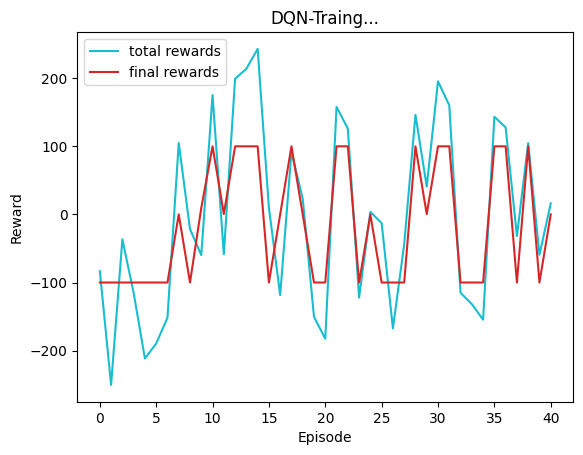

In [ ]:
import os
import torch
import matplotlib.pyplot as plt


def parse_args():
    config = {
        'feedforward_dim' : 64,
        'seed' : 543,
        'lr' : 1e-3,
        'memory_capacity' : 10000,
        'batch_size' : 128,
        'target_net_update_rate' : 0.005,
        'do_pretrain' : False,
        'onColab' : True,
        'ckpt_dir_config' : {
            'local' : './checkpoints/',
            'drive' : '/content/drive/MyDrive/ML2021/hw12/checkpoints/'
        },
        'load_ckpt' : False,
    }
    return config

def main(
    feedforward_dim,
    seed,
    lr,
    memory_capacity,
    batch_size,
    target_net_update_rate,
    do_pretrain,
    onColab,
    ckpt_dir_config,
    load_ckpt,
):
    device = get_device()

    if device == 'cuda':
        num_episodes = 6000
    elif device == 'cpu':
        num_episodes = 1000
    else:
        raise Exception(f"{device} is not support. Only 'cuda' or 'cpu'.")

    # environment
    env = create_env('LunarLander-v2')
    fix_seed(env, seed)
    n_observations = 8
    n_actions = 4

    if onColab:
        ckpt_dir = ckpt_dir_config['drive']
    else:
        ckpt_dir = ckpt_dir_config['local']
    os.makedirs(ckpt_dir, exist_ok=True)

    # model
    SL_handler = ModelSaveLoad(os.path.join(ckpt_dir, f'DQN{feedforward_dim}.ckpt'))
    policy_net = DQN(n_observations, n_actions, feedforward_dim)
    target_net = DQN(n_observations, n_actions, feedforward_dim)
    if load_ckpt:
        checkpoint = SL_handler.load()
        policy_net.load_state_dict(checkpoint['policy_net_state_dict'])
    policy_net.to(device)
    target_net.to(device)

    # optimizer for DQN
    optimizer_dqn = torch.optim.AdamW(policy_net.parameters(), lr=lr, amsgrad=True)

    # memory for replay
    memory = ReplayMemory(memory_capacity)

    # pre-train model
    if do_pretrain:
        # optimizer for pre-train
        optimizer_pre = torch.optim.SGD(policy_net.parameters(), lr=lr)

        pretrain_total_rewards, pretrain_final_rewards =\
            pretrain_model(env, policy_net, optimizer_pre, memory)

        # --TODO--
        # Save pre-trained result if needed.

    # set target_net
    target_net.load_state_dict(policy_net.state_dict())

    # epsilon greedy strategy for DQN training
    if load_ckpt:
        eps_greedy = EpsilonGreedy(steps_done=checkpoint['steps_done'])

    else:
        eps_greedy = EpsilonGreedy()

    # logging
    episode_total_rewards = []
    episode_final_rewards = []

    # DQN training
    policy_net.train()
    target_net.eval()
    for i_episode in range(num_episodes):
        episode_rewards = []

        # initialize environment
        state = env.reset()

        # In order to collect state into batch for optimization process,
        # we extend its dimension. Example: [[0.1, 0.2, ..., 0.8]]
        state = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)

        while True:
            # Action has same dimesion as state. Example: [[3]]
            action = select_action_by_eps_greed(state, policy_net, eps_greedy, device)

            # Update environment.
            next_state, reward, done, _ = env.step(action.item())

            episode_rewards.append(reward)
            reward = torch.tensor([reward], device=device)  # Reward has only 1 dimension. Example: [105]

            # Check if the state is a final state.
            if done:
                next_state = None
            else:
                next_state = torch.tensor(next_state, dtype=torch.float32, device=device).unsqueeze(0)

            # collect transition memory
            memory.push(state, action, next_state, reward)

            # move to next state
            state = next_state

            # update policy_net by collected memory
            optimize_model(memory,
                           batch_size,
                           policy_net,
                           target_net,
                           optimizer_dqn,
                           device=device)

            # Soft update target_net.
            soft_update_target_net(policy_net.state_dict(),
                                   target_net.state_dict(),
                                   target_net,
                                   target_net_update_rate)

            if done:
                final_reward = episode_rewards[-1]
                episode_final_rewards.append(final_reward)
                episode_total_rewards.append(sum(episode_rewards))
                break

        if i_episode % 10 == 0:
            plot_rewards(episode_total_rewards, episode_final_rewards, 'DQN-Traing...')
            SL_handler.save(policy_net.state_dict(), eps_greedy.get_steps())

    plot_rewards(episode_total_rewards.copy(), episode_final_rewards.copy(), 'DQN-Result', True)


if __name__ == '__main__':
    main(**parse_args())

# Testing

In [ ]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

%matplotlib inline
from IPython import display


def parse_args():
    config = {
        'feedforward_dim' : 64,
        'seed' : 543,
        'onColab' : True,
        'ckpt_dir_config' : {
            'local' : './checkpoints/',
            'drive' : '/content/drive/MyDrive/ML2021/hw12/checkpoints/'
        },
    }
    return config

def main(
        feedforward_dim,
        seed,
        onColab,
        ckpt_dir_config,
):
    device = get_device()

    if onColab:
        ckpt_dir = ckpt_dir_config['drive']
    else:
        ckpt_dir = ckpt_dir_config['local']
    checkpoint = torch.load(os.path.join(ckpt_dir, f'DQN{feedforward_dim}.ckpt'))

    env = create_env('LunarLander-v2')
    fix_seed(env, seed)
    n_observations = 8
    n_actions = 4

    agent = DQN(n_observations, n_actions, feedforward_dim)
    agent.load_state_dict(checkpoint[f'policy_net_state_dict'])
    agent.to(device)
    agent.eval()

    NUM_OF_TEST = 5
    test_total_reward = []
    action_list = []

    # testing
    for i in range(NUM_OF_TEST):

        done = False
        actions = []
        total_reward = 0

        img = plt.imshow(env.render(mode='rgb_array'))

        initial_state = env.reset()
        state = torch.tensor(initial_state, dtype=torch.float32, device=device)

        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            
            actions.append(action)
            total_reward += reward

            state = torch.tensor(next_state, dtype=torch.float32, device=device)

            img.set_data(env.render(mode='rgb_array'))
            display.display(plt.gcf())
            display.clear_output(wait=True)
        
        print(total_reward)
        test_total_reward.append(total_reward)
        action_list.append(actions)

    distribution = {}
    for actions in action_list:
        for action in actions:
            if action not in distribution.keys():
                distribution[action] = 1
            else:
                distribution[action] += 1
    print(f'Action distribution: {distribution}')
    print(f'Reward: {np.mean(test_total_reward)}')



if __name__ == '__main__':
    main(**parse_args())